estadístico: 0.999, p.valor: 0.702
estadístico: 0.016, p.valor: 0.965


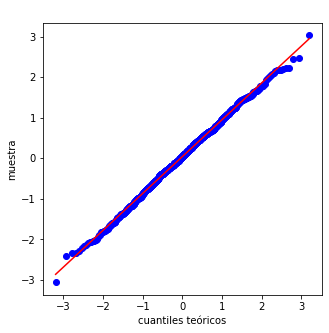

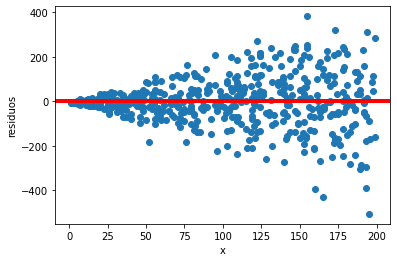

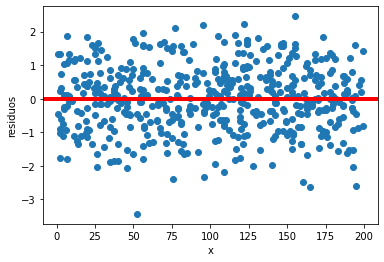

El resultado del test Breusch-Pagan es: p.valor = 0.000
El resultado del test Breusch-Pagan es: p.valor = 0.881
La media recortada al 20% es 6.75
La media recortada al 10% es 8.94
La centrimedia es 6.4
La media winsorizada es 6.9
La trimedia es  6.5
La media muestral es 10.7
La mediana de la muestra vale me_x =  6.5
El MAD vale 2.5
La desviación típica es 13.3


In [ ]:
#!/usr/local/bin/python
# coding: latin-1
import os, sys
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
# definir semilla para que los resultados sean los mismos--------
np.random.seed(seed = 11)
# se definen los parametros de la distribucion normal------------
mu, sigma = 0.05, 0.9
# se obtiene la muestra estandarizada----------------------------
muestra = np.random.normal(mu, sigma, 1000)
# se realiza la prueba-------------------------------------------
sh_result = stats.shapiro(muestra)
# dar formato a la salida----------------------------------------
print("estadístico: %5.3f, p.valor: %5.3f" %(sh_result[0],sh_result[1]))
# definir semilla para que los resultados sean los mismos--------
np.random.seed(seed = 11)
# se definen los parametros de la distribucion normal------------
mu, sigma = 0.05, 0.9
# se obtiene la muestra------------------------------------------
muestra_2 = np.random.normal(mu, sigma, 10000)
# se realiza la prueba-------------------------------------------
ks_result = stats.kstest(muestra, "norm", args = (mu,sigma))
# dar formato a la salida----------------------------------------
print("estadístico: %5.3f, p.valor: %5.3f" %(ks_result.statistic,
ks_result.pvalue))
# definir dimensiones de la figura-------------------------------
fig = plt.figure(figsize=(5,5))
qqplot = stats.probplot(muestra, dist = "norm", plot = plt)
plt.xlabel("cuantiles teóricos")
plt.ylabel("muestra")
plt.title(" ")
plt.show()
# EJERCICIO 2
# definir semilla para que los resultados sean los mismos--------
np.random.seed(seed = 11)
# se obtiene la muestra normal-----------------------------------
muestra_normal = np.random.normal(0, 1, 500)
muestra_unif = np.random.randint(0, 200, 500)
# para la muestra y1---------------------------------------------
y1 = 100 + 200 * muestra_unif + muestra_normal * muestra_unif
# Se necesita trasponer el vector x------------------------------
x = muestra_unif.reshape((-1, 1))
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x, y1)
# obtener valores modelo-----------------------------------------
y_pred1 = model1.predict(x)
# obtener residuos-----------------------------------------------
residuos1 = y1 - y_pred1
# para la muestra y2---------------------------------------------
y2 = 100 + 200 * muestra_unif + muestra_normal
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x, y2)
# obtener valores modelo-----------------------------------------
y_pred2 = model2.predict(x)
# obtener residuos-----------------------------------------------
residuos2 = y2 - y_pred2
plt.scatter(x, residuos1)
plt.axhline(0, color = "red", linewidth = 4)
plt.xlabel("x")
plt.ylabel("residuos")
plt.show()
plt.scatter(x, residuos2)
plt.axhline(0, color = "red", linewidth = 4)
plt.xlabel("x")
plt.ylabel("residuos")
plt.show()
# y1-------------------------------------------------------------
m1 = sm.OLS(y1, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid, 
exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f" 
%(bp1))

# y2-------------------------------------------------------------
m2 = sm.OLS(y2, sm.add_constant(x)).fit()
bp2 = sms.het_breuschpagan(resid = m2.resid, 
exog_het = m2.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f" 
%(bp2))
# EJERCICIO 3
# definir la muestra---------------------------------------------
X = np.array([4, 3, 11, 5, 4, 50, 6, 8, 7, 9])
# ordenar los valores de la muestra------------------------------
X.sort()
# print(X)
# quitar valores recortados 0.1----------------------------------
X1 = X[1:9]
# print(X1)
print("La media recortada al 20% es", sum(X1)/8)
# quitar valores recortados 0.05---------------------------------
X2 = np.array([3*0.5,  4,  4,  5,  6,  7,  8,  9, 11, 50*0.5])
print("La media recortada al 10% es",round(sum(X2)/9, 2))
# quitar valores recortados 0.25 (centrimedia)-------------------
X3 = X[2:8]
# print(X3)
X3[0] = 4*0.5
X3[5] = 8*0.5
print("La centrimedia es", sum(X3)/5)
# definir la muestra---------------------------------------------
X = np.array([4, 3, 11, 5, 4, 50, 6, 8, 7, 9])
# ordenar los valores de la muestra------------------------------
X.sort()
# print(X)
# quitar valores recortados 0.1----------------------------------
W1 = np.array([4,  4,  4,  5,  6,  7,  8,  9, 11, 11])
# print(W1)
print("La media winsorizada es", sum(W1)/10)
# definir la muestra---------------------------------------------
X = np.array([4, 3, 11, 5, 4, 50, 6, 8, 7, 9])
# ordenar los valores de la muestra------------------------------
X.sort()

q1_x = np.quantile(X, 0.25, interpolation='midpoint')
me_x = np.quantile(X, 0.5, interpolation='midpoint')
q3_x = np.quantile(X, 0.75, interpolation='midpoint')

trimedia = (q1_x + 2 * me_x + q3_x)/4
print("La trimedia es ", trimedia)
# definir la muestra---------------------------------------------
X = np.array([4, 3, 11, 5, 4, 50, 6, 8, 7, 9])
# ordenar los valores de la muestra------------------------------
print("La media muestral es", X.mean())
print("La mediana de la muestra vale me_x = ", me_x)
# construir vector diferencias absolutas-------------------------
AD = abs(X - me_x)
MAD = np.quantile(AD, 0.5, interpolation = "midpoint")

print("El MAD vale", MAD)

print("La desviación típica es", round(X.std(), 1))